In [1]:
#import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
from datetime import datetime

In [3]:
#data importing

In [4]:
revenue=pd.read_csv("Schedule Data.csv")
asset=pd.read_csv("ASSET_METADATA.csv")

In [5]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ASSET_ID                2517 non-null   int64  
 1   AIRING_START_DATE_TIME  2517 non-null   object 
 2   AIRING_END_DATE_TIME    2517 non-null   object 
 3   PREMIER_AIRING          2517 non-null   int64  
 4   EXHIBITION_AIRING       2517 non-null   int64  
 5   FREE_AIRING             2517 non-null   int64  
 6   SCHEDULED_RUNTIME       2517 non-null   int64  
 7   DAY_PART                2517 non-null   object 
 8   AIRING_REVENUE          2517 non-null   int64  
 9   C3_RATING               2509 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 196.8+ KB


In [6]:
revenue.head(3)

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0


In [7]:
revenue.sort_values(by='ASSET_ID')

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
414,171646,10/24/2014 18:30,10/24/2014 21:00,0,1,0,150,Early Fringe,178543,456122.0
1721,171652,1/20/2014 13:30,1/20/2014 15:30,0,1,0,120,Daytime,44330,209960.0
956,171652,1/8/2014 0:01,1/8/2014 2:00,0,1,0,119,Late Night,76430,483998.0
1768,171652,3/12/2014 1:00,3/12/2014 3:00,0,1,0,120,Late Night,24593,272520.0
1475,171652,7/1/2013 15:00,7/1/2013 17:00,0,0,1,120,Daytime,44120,225378.0
...,...,...,...,...,...,...,...,...,...,...
6,200321,8/28/2013 12:00,8/28/2013 14:00,0,1,0,120,Daytime,39261,261052.0
1560,200321,7/9/2013 11:30,7/9/2013 13:30,0,0,1,120,Daytime,31380,232279.0
1035,200437,7/28/2013 0:30,7/28/2013 3:30,1,1,0,180,Late Night,32152,611216.0
71,200437,7/31/2013 9:30,7/31/2013 12:30,0,0,1,180,Breakfast,57346,332919.0


In [8]:
revenue.isnull().sum()

ASSET_ID                  0
AIRING_START_DATE_TIME    0
AIRING_END_DATE_TIME      0
PREMIER_AIRING            0
EXHIBITION_AIRING         0
FREE_AIRING               0
SCHEDULED_RUNTIME         0
DAY_PART                  0
AIRING_REVENUE            0
C3_RATING                 8
dtype: int64

In [9]:
revenue.dropna(axis=0,inplace=True)
len(revenue)#8 rows with null values are removed

2509

In [10]:
revenue.drop(columns=['FREE_AIRING','EXHIBITION_AIRING','PREMIER_AIRING','AIRING_END_DATE_TIME'],inplace=True)

In [11]:
revenue['date']=pd.DatetimeIndex(revenue['AIRING_START_DATE_TIME']).date


<AxesSubplot:xlabel='DAY_PART', ylabel='Count'>

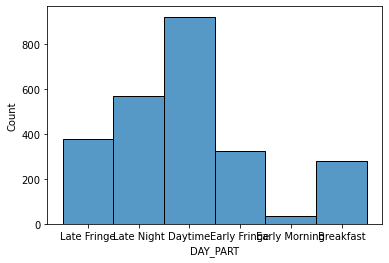

In [15]:
sns.histplot(data=revenue,x='DAY_PART',legend=True)#most of the shows are played in the daytime

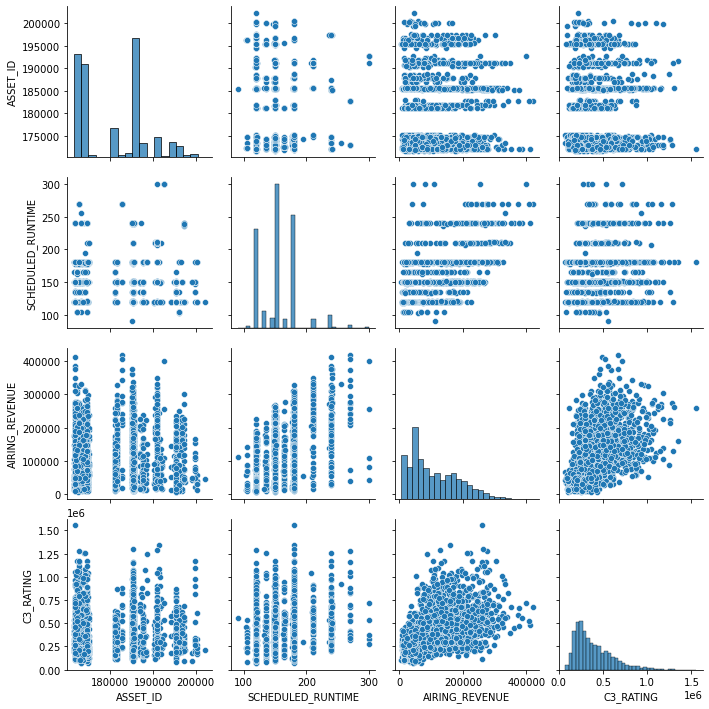

In [16]:
sns.pairplot(data=revenue)

<AxesSubplot:xlabel='DAY_PART', ylabel='AIRING_REVENUE'>

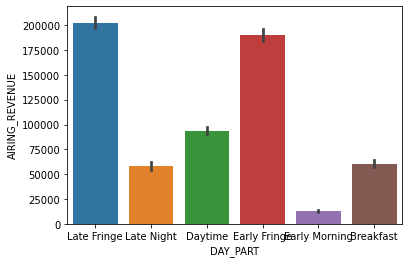

In [17]:
sns.barplot(data=revenue,x='DAY_PART',y='AIRING_REVENUE')

In [18]:
#here we can view that even if the number of shows is more during daytime,the revenue collected is higher during late fringe

In [19]:
revenue.head(1)

,ASSET_ID,AIRING_START_DATE_TIME,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,date
0,174543,9/13/2013 21:15,150,Late Fringe,197840,595443.0,2013-09-13


In [20]:
revenue['month']=pd.DatetimeIndex(revenue['date']).month
revenue['year']=pd.DatetimeIndex(revenue['date']).year

In [21]:
revenue

,ASSET_ID,AIRING_START_DATE_TIME,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,date,month,year
0,174543,9/13/2013 21:15,150,Late Fringe,197840,595443.0,2013-09-13,9,2013
1,181758,9/24/2014 0:00,180,Late Night,89818,216841.0,2014-09-24,9,2014
2,191074,9/12/2013 14:15,120,Daytime,60064,388053.0,2013-09-12,9,2013
3,196156,7/14/2013 18:00,180,Early Fringe,164494,670869.0,2013-07-14,7,2013
4,174201,11/14/2014 15:30,120,Daytime,86961,311122.0,2014-11-14,11,2014
...,...,...,...,...,...,...,...,...,...
2512,185554,9/27/2014 1:30,150,Late Night,23021,336985.0,2014-09-27,9,2014
2513,171859,1/29/2014 9:30,150,Breakfast,50155,184164.0,2014-01-29,1,2014
2514,171986,8/18/2014 15:30,150,Daytime,86038,461515.0,2014-08-18,8,2014
2515,185461,9/12/2013 10:00,135,Daytime,43436,206781.0,2013-09-12,9,2013


In [22]:
new_year=1/1/2013
#revenue[revenue['AIRING_START_DATE_TIME']=='2/1/2013']
revenue['month'].unique()
revenue['days']=pd.DatetimeIndex(revenue['date']).weekday
revenue


,ASSET_ID,AIRING_START_DATE_TIME,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,date,month,year,days
0,174543,9/13/2013 21:15,150,Late Fringe,197840,595443.0,2013-09-13,9,2013,4
1,181758,9/24/2014 0:00,180,Late Night,89818,216841.0,2014-09-24,9,2014,2
2,191074,9/12/2013 14:15,120,Daytime,60064,388053.0,2013-09-12,9,2013,3
3,196156,7/14/2013 18:00,180,Early Fringe,164494,670869.0,2013-07-14,7,2013,6
4,174201,11/14/2014 15:30,120,Daytime,86961,311122.0,2014-11-14,11,2014,4
...,...,...,...,...,...,...,...,...,...,...
2512,185554,9/27/2014 1:30,150,Late Night,23021,336985.0,2014-09-27,9,2014,5
2513,171859,1/29/2014 9:30,150,Breakfast,50155,184164.0,2014-01-29,1,2014,2
2514,171986,8/18/2014 15:30,150,Daytime,86038,461515.0,2014-08-18,8,2014,0
2515,185461,9/12/2013 10:00,135,Daytime,43436,206781.0,2013-09-12,9,2013,3


In [23]:
#to find the days of the week 

In [24]:
 def week(i):
        switcher={
                0:'Sunday',
                1:'Monday',
                2:'Tuesday',
                3:'Wednesday',
                4:'Thursday',
                5:'Friday',
                6:'Saturday'
        }
        return switcher.get(i)
revenue['days']=revenue['days'].apply(week)

In [25]:
revenue

,ASSET_ID,AIRING_START_DATE_TIME,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,date,month,year,days
0,174543,9/13/2013 21:15,150,Late Fringe,197840,595443.0,2013-09-13,9,2013,Thursday
1,181758,9/24/2014 0:00,180,Late Night,89818,216841.0,2014-09-24,9,2014,Tuesday
2,191074,9/12/2013 14:15,120,Daytime,60064,388053.0,2013-09-12,9,2013,Wednesday
3,196156,7/14/2013 18:00,180,Early Fringe,164494,670869.0,2013-07-14,7,2013,Saturday
4,174201,11/14/2014 15:30,120,Daytime,86961,311122.0,2014-11-14,11,2014,Thursday
...,...,...,...,...,...,...,...,...,...,...
2512,185554,9/27/2014 1:30,150,Late Night,23021,336985.0,2014-09-27,9,2014,Friday
2513,171859,1/29/2014 9:30,150,Breakfast,50155,184164.0,2014-01-29,1,2014,Tuesday
2514,171986,8/18/2014 15:30,150,Daytime,86038,461515.0,2014-08-18,8,2014,Sunday
2515,185461,9/12/2013 10:00,135,Daytime,43436,206781.0,2013-09-12,9,2013,Wednesday


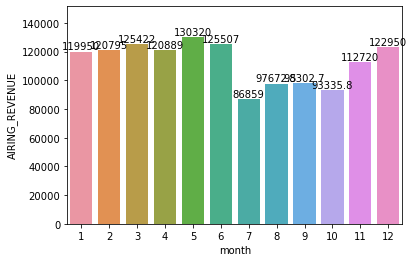

In [26]:
axs=sns.barplot(x='month',y='AIRING_REVENUE',data=revenue,errwidth=0)#the revenue is more during april,may,june months
for i in axs.containers:
    axs.bar_label(i,)

<AxesSubplot:xlabel='days', ylabel='AIRING_REVENUE'>

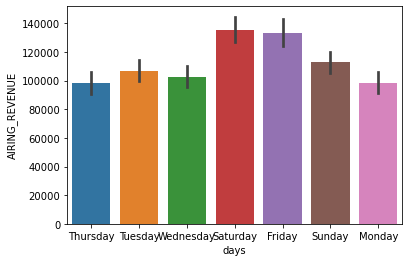

In [27]:
sns.barplot(x='days',y='AIRING_REVENUE',data=revenue)#we can view that most of the airing revenue is from sat and friday

In [28]:
revenue.dtypes

ASSET_ID                    int64
AIRING_START_DATE_TIME     object
SCHEDULED_RUNTIME           int64
DAY_PART                   object
AIRING_REVENUE              int64
C3_RATING                 float64
date                       object
month                       int64
year                        int64
days                       object
dtype: object

<AxesSubplot:xlabel='days', ylabel='SCHEDULED_RUNTIME'>

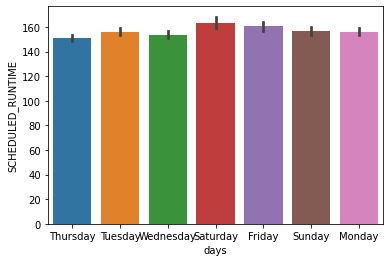

In [29]:
sns.barplot(x='days',y='SCHEDULED_RUNTIME',data=revenue)

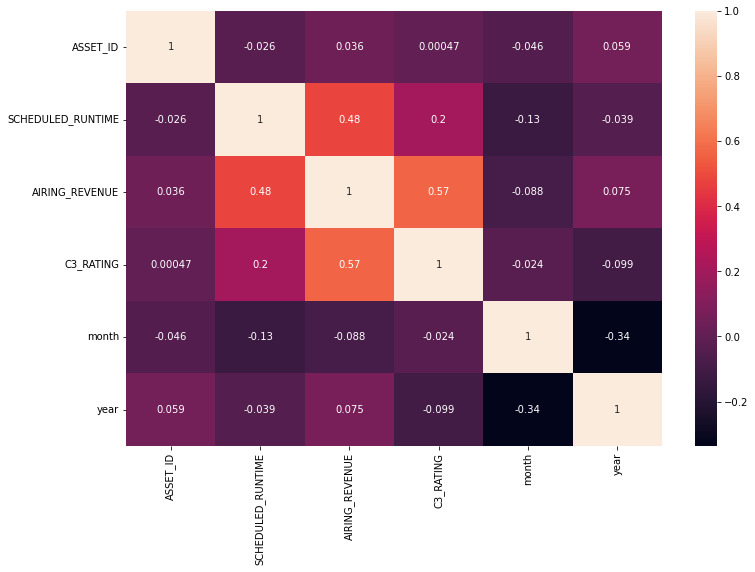

                   ASSET_ID  SCHEDULED_RUNTIME  AIRING_REVENUE  C3_RATING  \
ASSET_ID           1.000000          -0.026099        0.035886   0.000466   
SCHEDULED_RUNTIME -0.026099           1.000000        0.482618   0.203346   
AIRING_REVENUE     0.035886           0.482618        1.000000   0.565514   
C3_RATING          0.000466           0.203346        0.565514   1.000000   
month             -0.045709          -0.130601       -0.087856  -0.024070   
year               0.058517          -0.039239        0.074947  -0.098680   

                      month      year  
ASSET_ID          -0.045709  0.058517  
SCHEDULED_RUNTIME -0.130601 -0.039239  
AIRING_REVENUE    -0.087856  0.074947  
C3_RATING         -0.024070 -0.098680  
month              1.000000 -0.336014  
year              -0.336014  1.000000  


In [30]:
correlation_metrics=revenue.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_metrics,annot=True,)
plt.show()
print(correlation_metrics)

In [31]:
%matplotlib inline

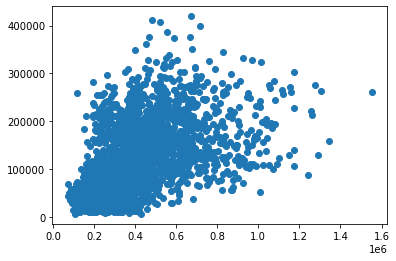

In [32]:
plt.scatter(x=revenue['C3_RATING'],y=revenue['AIRING_REVENUE'])

In [33]:
revenue['C3_RATING'].corr(revenue['AIRING_REVENUE'])#there are moderately related

0.5655139810172989

In [34]:
revenue['C3_RATING'].mean()

390599.6907134316

In [35]:
revenue['C3_RATING'].median()

332919.0

In [36]:
revenue['C3_RATING'].describe()

count    2.509000e+03
mean     3.905997e+05
std      2.127546e+05
min      7.152900e+04
25%      2.315390e+05
50%      3.329190e+05
75%      5.091160e+05
max      1.553844e+06
Name: C3_RATING, dtype: float64

In [37]:
revenue['DAY_PART'].mode()

0    Daytime
dtype: object

In [38]:
revenue['DAY_PART'].describe()

count        2509
unique          6
top       Daytime
freq          922
Name: DAY_PART, dtype: object

In [61]:
#shows.rename({'ASSET_ID':'no_of_shows'},inplace=True).reset_index()
shows=revenue.groupby('ASSET_ID')['ASSET_ID'].count()
shows.rename_axis("Asset_id")

Asset_id
171646     1
171652    11
171685     2
171709     2
171731     1
          ..
199914     1
199915     4
200321     4
200437     2
202224     1
Name: ASSET_ID, Length: 412, dtype: int64

In [62]:
shows=shows.to_frame(name='no_of_shows').reset_index()

In [63]:
shows.max()

ASSET_ID       202224
no_of_shows        28
dtype: int64

In [64]:
asset=pd.read_csv("ASSET_METADATA.csv")

In [65]:
asset.columns=asset.columns.str.lower()



In [66]:
asset.replace({'asset_id':'ASSET_ID'},inplace=True)
shows.columns=shows.columns.str.lower()

In [67]:
shows=pd.merge(left=shows,right=asset,on='asset_id')
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_meter,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings
0,171646,1,1978.0,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN
1,171652,11,2002.0,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,40.0,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000"
2,171685,2,2002.0,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,171709,2,1997.0,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,45.0,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN
4,171731,1,1998.0,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,93.0,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973.0,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,98.0,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN
408,199915,4,1989.0,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,50.0,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN
409,200321,4,2007.0,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,12.0,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000"
410,200437,2,1975.0,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,69.0,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN


In [68]:
total_revenue=revenue.groupby('ASSET_ID')['AIRING_REVENUE'].sum()
total_revenue.to_frame().reset_index

<bound method DataFrame.reset_index of           AIRING_REVENUE
ASSET_ID                
171646            178543
171652            713100
171685            159644
171709            128540
171731             29443
...                  ...
199914            107476
199915            507530
200321            123589
200437             89498
202224             44510

[412 rows x 1 columns]>

In [69]:
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_meter,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings
0,171646,1,1978.0,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN
1,171652,11,2002.0,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,40.0,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000"
2,171685,2,2002.0,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,171709,2,1997.0,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,45.0,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN
4,171731,1,1998.0,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,93.0,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973.0,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,98.0,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN
408,199915,4,1989.0,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,50.0,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN
409,200321,4,2007.0,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,12.0,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000"
410,200437,2,1975.0,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,69.0,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN


In [70]:
total_revenue

ASSET_ID
171646    178543
171652    713100
171685    159644
171709    128540
171731     29443
           ...  
199914    107476
199915    507530
200321    123589
200437     89498
202224     44510
Name: AIRING_REVENUE, Length: 412, dtype: int64

In [71]:
total_revenue=total_revenue.to_frame(name='total_revenue').reset_index()


In [72]:
total_revenue.columns=total_revenue.columns.str.lower()

In [73]:
shows=pd.merge(shows,total_revenue,on='asset_id')

In [74]:
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings,total_revenue
0,171646,1,1978.0,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN,178543
1,171652,11,2002.0,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000",713100
2,171685,2,2002.0,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159644
3,171709,2,1997.0,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN,128540
4,171731,1,1998.0,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN,29443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973.0,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN,107476
408,199915,4,1989.0,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN,507530
409,200321,4,2007.0,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000",123589
410,200437,2,1975.0,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN,89498


In [75]:
type(shows)

pandas.core.frame.DataFrame

In [76]:
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings,total_revenue
0,171646,1,1978.0,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN,178543
1,171652,11,2002.0,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000",713100
2,171685,2,2002.0,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159644
3,171709,2,1997.0,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN,128540
4,171731,1,1998.0,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN,29443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973.0,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN,107476
408,199915,4,1989.0,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN,507530
409,200321,4,2007.0,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000",123589
410,200437,2,1975.0,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN,89498


In [77]:
shows['release_year']=shows['release_year'].astype(int)

In [78]:
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings,total_revenue
0,171646,1,1978,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN,178543
1,171652,11,2002,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000",713100
2,171685,2,2002,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159644
3,171709,2,1997,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN,128540
4,171731,1,1998,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN,29443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN,107476
408,199915,4,1989,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN,507530
409,200321,4,2007,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000",123589
410,200437,2,1975,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN,89498


In [84]:
shows['genre'].nunique()

146

<AxesSubplot:xlabel='asset_id', ylabel='no_of_shows'>

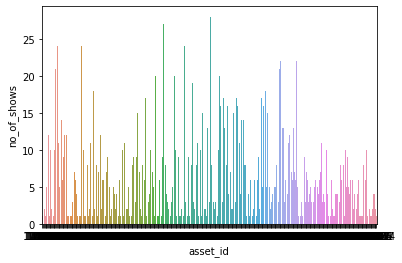

In [79]:
sns.barplot(x='asset_id',y='no_of_shows',data=shows)

<AxesSubplot:xlabel='ASSET_ID', ylabel='Count'>

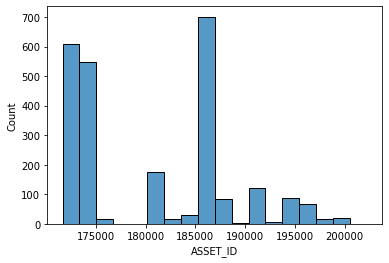

In [81]:
sns.histplot(data=revenue,x='ASSET_ID')

<AxesSubplot:xlabel='genre', ylabel='no_of_shows'>

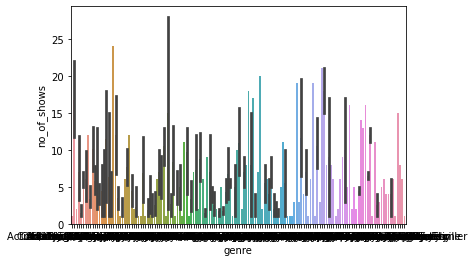

In [82]:
sns.barplot(x='genre',y='no_of_shows',data=shows)

In [85]:
shows

,asset_id,no_of_shows,release_year,mpaa_rating,genre,imdb_rating,imdb_ranking,imdb_votes,oscar-nomination,oscar-wins,...,tomato_rating,tomato_reviews,tomato_fresh,tomato_rotten,tomato_user_meter,tomato_user_ratings,tomato_user_reviews,tomato_image,box_office_earnings,total_revenue
0,171646,1,1978,R,"Drama, Horror",6.2,NaN,"20,325",0,0,...,NaN,NaN,NaN,NaN,50.0,3.4,27.0,NaN,NaN,178543
1,171652,11,2002,PG-13,"Action, Adventure, Fantasy",6.2,39.0,100869,0,0,...,5.2,154.0,62.0,92.0,49.0,3.0,131668.0,rotten,"$42,900,000",713100
2,171685,2,2002,NaN,"Short, Documentary",4.8,NaN,84,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159644
3,171709,2,1997,R,"Crime, Drama",6.2,50.0,"7,684",0,0,...,5.6,20.0,9.0,11.0,67.0,3.3,9909.0,rotten,NaN,128540
4,171731,1,1998,R,"Comedy, Crime, Romance",7.1,85.0,"68,313",2,0,...,7.9,88.0,82.0,6.0,74.0,3.2,58992.0,certified,NaN,29443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,199914,1,1973,R,"Crime, Drama",7.4,NaN,"62,604",0,0,...,8.9,50.0,49.0,1.0,85.0,3.9,53342.0,certified,NaN,107476
408,199915,4,1989,R,"Action, Crime, Thriller",5.6,NaN,"6,478",0,0,...,4.8,8.0,4.0,4.0,45.0,3.2,9570.0,rotten,NaN,507530
409,200321,4,2007,PG-13,"Drama, Horror, Thriller",5.4,34.0,"31,977",0,0,...,3.7,83.0,10.0,73.0,44.0,3.1,491783.0,rotten,"$35,400,000",123589
410,200437,2,1975,R,"Action, Thriller",6.4,NaN,"11,711",0,0,...,6.4,13.0,9.0,4.0,55.0,3.2,7723.0,fresh,NaN,89498


<AxesSubplot:xlabel='genre', ylabel='Count'>

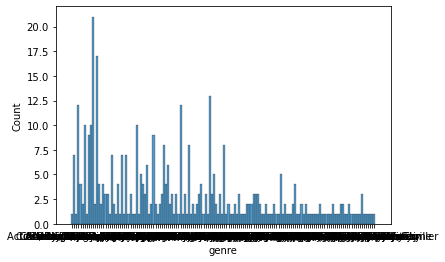

In [86]:
def genre_

#3. Create a model with the data to estimate revenue that an asset will generate if telecasted at a
#given time point (day-part and date).


<AxesSubplot:xlabel='tomato_image', ylabel='total_revenue'>

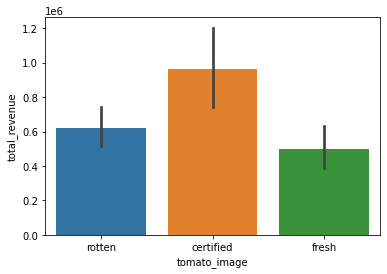

In [101]:
sns.barplot(x='tomato_image',y='total_revenue',data=shows,)

<AxesSubplot:xlabel='imdb_rating', ylabel='total_revenue'>

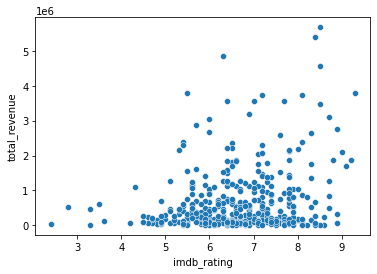

In [104]:
sns.scatterplot(x='imdb_rating',y='total_revenue',data=shows,)